In [1]:
# Dependencies
import requests
from pprint import pprint
from config_ab import api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import datetime

url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
url



'https://api.nytimes.com/svc/search/v2/articlesearch.json?'

In [58]:
# Search for articles that mention granola
query = "machine learning"

In [59]:
#query_url = url + "api-key=" + api_key + "&q=" + query
#query_url

begin_date = "20100101"
end_date = "20191231"

#query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"


In [60]:
articles_list= []

#loop through pages 0-2
for page in range(0, 10):
    query_url = f"{url}api-key={api_key}&q={query}&begin_date={begin_date}&end_date={end_date}"
     #create query with page number
    query_url = f"{query_url}&page={str(page)}"
    articles = requests.get(query_url).json()
    
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    # loop through the response and append each article to the list
    for article in articles["response"]["docs"]:
       articles_list.append(article)

In [61]:
articles_list

[{'abstract': 'Microsoft plans to make predictive data analysis, now an arcane field, a standard part of business. The company says that a product due out in July will simplify what are now expensive, difficult processes.',
  'web_url': 'https://bits.blogs.nytimes.com/2014/06/16/microsoft-unveils-machine-learning-for-the-masses/',
  'snippet': 'Microsoft plans to make predictive data analysis, now an arcane field, a standard part of business. The company says that a product due out in July will simplify what are now expensive, difficult processes.',
  'lead_paragraph': 'Microsoft has a new strategy to win cloud business: A supposedly comprehensive predictive analysis service — and all you have to do is store your data in Azure, the Microsoft cloud.',
  'source': 'The New York Times',
  'multimedia': [{'rank': 0,
    'subtype': 'wide',
    'caption': None,
    'credit': None,
    'type': 'image',
    'url': 'images/2014/06/16/technology/16bits/16bits-thumbWide-v4.jpg',
    'height': 126

In [62]:
# Request articles
#articles = requests.get(query_url).json()
#articles

# The "response" property in articles contains the actual articles
# list comprehension.
#articles_list = articles["response"]["docs"]
#pprint(articles_list)

In [63]:
# Print the web_url of each stored article
print("Your Reading List")
for article in articles_list:
    print(article["web_url"],article["pub_date"])
    
    

Your Reading List
https://bits.blogs.nytimes.com/2014/06/16/microsoft-unveils-machine-learning-for-the-masses/ 2014-06-16T16:00:31+0000
https://bits.blogs.nytimes.com/2015/11/09/google-offers-free-software-in-bid-to-gain-an-edge-in-machine-learning/ 2015-11-09T14:00:22+0000
https://open.blogs.nytimes.com/2016/08/09/summer-intern-report-prototyping-an-improved-search-query-with-machine-learning/ 2016-08-09T14:31:24+0000
https://www.nytimes.com/2019/12/18/education/artificial-intelligence-tutors-teachers.html 2019-12-18T10:00:28+0000
https://www.nytimes.com/2018/03/08/learning/teaching-activities-for-google-researchers-are-learning-how-machines-learn.html 2018-03-08T09:00:00+0000
https://www.nytimes.com/2018/03/06/technology/google-artificial-intelligence.html 2018-03-06T18:24:55+0000
https://www.nytimes.com/2015/10/29/t-magazine/photography-joseph-desler-costa.html 2015-10-29T16:13:37+0000
https://www.nytimes.com/slideshow/2015/10/29/t-magazine/joseph-desler-costas-extreme-learning-mach

In [64]:
articles_list_df_raw=pd.DataFrame(articles_list)

articles_list_df = pd.DataFrame(articles_list_df_raw[['web_url', 'snippet', 'headline', 'pub_date','keywords', 'news_desk', 'uri'] ])

articles_list_df['pub_year'] = pd.DatetimeIndex(articles_list_df['pub_date']).year

articles_list_df







,web_url,snippet,headline,pub_date,keywords,news_desk,uri,pub_year
0,https://bits.blogs.nytimes.com/2014/06/16/micr...,Microsoft plans to make predictive data analys...,{'main': 'Microsoft Unveils Machine Learning f...,2014-06-16T16:00:31+0000,"[{'name': 'subject', 'value': 'Cloud Computing...",Business,nyt://article/f4637d6f-8f11-5849-9153-2f20e390...,2014
1,https://bits.blogs.nytimes.com/2015/11/09/goog...,Google is making much of its machine-learning ...,{'main': 'Google Offers Free Software in Bid t...,2015-11-09T14:00:22+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",Business,nyt://article/3bfeffad-cc5e-55b9-8b5f-f118c2c8...,2015
2,https://open.blogs.nytimes.com/2016/08/09/summ...,One of our Search interns shares details about...,{'main': 'Summer Intern Report: Prototyping an...,2016-08-09T14:31:24+0000,"[{'name': 'subject', 'value': 'Internships', '...",,nyt://article/1a690f2c-ca8f-52b1-b10c-54c7fd54...,2016
3,https://www.nytimes.com/2019/12/18/education/a...,Artificial intelligence is starting to take ov...,"{'main': 'The Machines Are Learning, and So Ar...",2019-12-18T10:00:28+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",SpecialSections,nyt://article/0bf8d3d2-1fc8-560a-96c2-e416ed5f...,2019
4,https://www.nytimes.com/2018/03/08/learning/te...,Is the computer mind any easier to understand ...,{'main': 'Teaching Activities for: ‘Google Res...,2018-03-08T09:00:00+0000,[],Learning,nyt://article/1566eab5-b1e7-5248-ad79-f793e1b5...,2018
...,...,...,...,...,...,...,...,...
95,https://cityroom.blogs.nytimes.com/2010/10/01/...,A public outreach demonstration on the new ele...,{'main': 'Latest Rain Casualty? Voter Educatio...,2010-10-01T21:36:50+0000,[],,nyt://article/d151fda9-b543-5a2b-a651-9af6224d...,2010
96,https://www.nytimes.com/2017/11/29/technology/...,The internet retailer used an annual conferenc...,{'main': 'Amazon Trumpets Its Cloud Lead With ...,2017-11-30T00:06:28+0000,"[{'name': 'subject', 'value': 'Cloud Computing...",Business,nyt://article/e5ab42e7-8a1f-5758-85c9-b51db1ed...,2017
97,https://www.nytimes.com/paidpost/service-now/d...,No organization can reap the benefits of next-...,{'main': 'Digital Transformation Starts With P...,2019-03-14T21:44:11+0000,"[{'name': 'organizations', 'value': 'ServiceNo...",,nyt://paidpost/135ba544-499b-5ffd-937e-00bbbe3...,2019
98,https://www.nytimes.com/2018/01/04/technology/...,"Aurora, a start-up founded by the former head ...",{'main': 'Competing With the Giants in Race to...,2018-01-04T11:00:43+0000,"[{'name': 'subject', 'value': 'Driverless and ...",Business,nyt://article/e59e78e2-3136-5d59-9ecf-ad49bbb2...,2018


In [65]:
#Create Group By Categories
articles_list_df_raw=pd.DataFrame(articles_list)

articles_list_df = pd.DataFrame(articles_list_df_raw[['web_url', 'snippet', 'headline', 'pub_date','keywords', 'news_desk', 'uri'] ])

articles_list_df['pub_year'] = pd.DatetimeIndex(articles_list_df['pub_date']).year

articles_list_df



,web_url,snippet,headline,pub_date,keywords,news_desk,uri,pub_year
0,https://bits.blogs.nytimes.com/2014/06/16/micr...,Microsoft plans to make predictive data analys...,{'main': 'Microsoft Unveils Machine Learning f...,2014-06-16T16:00:31+0000,"[{'name': 'subject', 'value': 'Cloud Computing...",Business,nyt://article/f4637d6f-8f11-5849-9153-2f20e390...,2014
1,https://bits.blogs.nytimes.com/2015/11/09/goog...,Google is making much of its machine-learning ...,{'main': 'Google Offers Free Software in Bid t...,2015-11-09T14:00:22+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",Business,nyt://article/3bfeffad-cc5e-55b9-8b5f-f118c2c8...,2015
2,https://open.blogs.nytimes.com/2016/08/09/summ...,One of our Search interns shares details about...,{'main': 'Summer Intern Report: Prototyping an...,2016-08-09T14:31:24+0000,"[{'name': 'subject', 'value': 'Internships', '...",,nyt://article/1a690f2c-ca8f-52b1-b10c-54c7fd54...,2016
3,https://www.nytimes.com/2019/12/18/education/a...,Artificial intelligence is starting to take ov...,"{'main': 'The Machines Are Learning, and So Ar...",2019-12-18T10:00:28+0000,"[{'name': 'subject', 'value': 'ARTIFICIAL INTE...",SpecialSections,nyt://article/0bf8d3d2-1fc8-560a-96c2-e416ed5f...,2019
4,https://www.nytimes.com/2018/03/08/learning/te...,Is the computer mind any easier to understand ...,{'main': 'Teaching Activities for: ‘Google Res...,2018-03-08T09:00:00+0000,[],Learning,nyt://article/1566eab5-b1e7-5248-ad79-f793e1b5...,2018
...,...,...,...,...,...,...,...,...
95,https://cityroom.blogs.nytimes.com/2010/10/01/...,A public outreach demonstration on the new ele...,{'main': 'Latest Rain Casualty? Voter Educatio...,2010-10-01T21:36:50+0000,[],,nyt://article/d151fda9-b543-5a2b-a651-9af6224d...,2010
96,https://www.nytimes.com/2017/11/29/technology/...,The internet retailer used an annual conferenc...,{'main': 'Amazon Trumpets Its Cloud Lead With ...,2017-11-30T00:06:28+0000,"[{'name': 'subject', 'value': 'Cloud Computing...",Business,nyt://article/e5ab42e7-8a1f-5758-85c9-b51db1ed...,2017
97,https://www.nytimes.com/paidpost/service-now/d...,No organization can reap the benefits of next-...,{'main': 'Digital Transformation Starts With P...,2019-03-14T21:44:11+0000,"[{'name': 'organizations', 'value': 'ServiceNo...",,nyt://paidpost/135ba544-499b-5ffd-937e-00bbbe3...,2019
98,https://www.nytimes.com/2018/01/04/technology/...,"Aurora, a start-up founded by the former head ...",{'main': 'Competing With the Giants in Race to...,2018-01-04T11:00:43+0000,"[{'name': 'subject', 'value': 'Driverless and ...",Business,nyt://article/e59e78e2-3136-5d59-9ecf-ad49bbb2...,2018


In [69]:
nyt_pub_year_grp = articles_list_df.groupby('pub_year')
nyt_news_desk_grp = articles_list_df.groupby('news_desk')

In [74]:
nyt_machine_learning_by_year_raw = pd.DataFrame(nyt_pub_year_grp['web_url'].count()).reset_index()
nyt_machine_learning_by_year = nyt_machine_learning_by_year_raw.rename(columns={'web_url':'total'})
nyt_machine_learning_by_year 

,pub_year,total
0,2010,9
1,2011,5
2,2012,7
3,2013,6
4,2014,6
5,2015,16
6,2016,11
7,2017,12
8,2018,21
9,2019,7


In [75]:
nyt_machine_learning_by_news_desk_raw = pd.DataFrame(nyt_news_desk_grp['web_url'].count()).reset_index()
nyt_machine_learning_by_news_desk = nyt_machine_learning_by_news_desk_raw.rename(columns={'web_url': 'total'})
nyt_machine_learning_by_news_desk

,news_desk,total
0,,24
1,Business,32
2,Culture,1
3,Editorial,1
4,Express,1
5,Insider,1
6,Learning,9
7,Magazine,2
8,National,8
9,OpEd,6


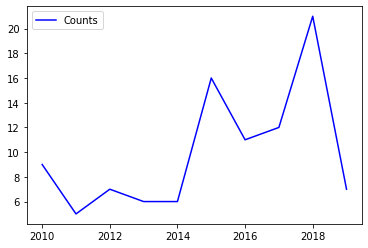

In [77]:
#Chart Time Series
#combined_unemployed_data = combined_unemployed_data.set_index("Country Code")

news_desks = []
news_desks_totals = []
year_totals = []
years = []


for news_desk in nyt_machine_learning_by_news_desk['news_desk']:
    news_desks.append(news_desk)
    
for total in nyt_machine_learning_by_news_desk['total']:
    news_desks_totals.append(total)
    
for pub_year in nyt_machine_learning_by_year['pub_year']:
    years.append(pub_year)
    
for total in nyt_machine_learning_by_year['total']:
    year_totals.append(total)




# Plot the world average as a line chart
world_avg = plt.plot(years, year_totals, color="blue", label="Counts" )

# Plot the unemployment values for a single country
#country_one, = plt.plot(news_desks, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[world_avg ], loc="best")

# Show the chart
plt.show()

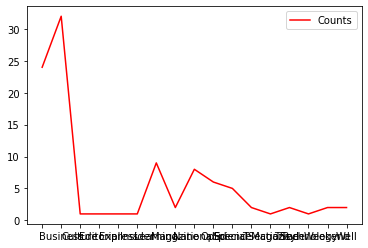

<Figure size 1440x720 with 0 Axes>

In [85]:



nd_totals, = plt.plot(news_desks, news_desks_totals, color="red", label="Counts" )

# Plot the unemployment values for a single country
#country_one, = plt.plot(news_desks, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        #color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[nd_totals ], loc="best")
plt.figure(figsize=(20,10))


# Show the chart
plt.show()